In [1]:
import pyshark
import matplotlib.pyplot as plt
import numpy as np
import nest_asyncio
nest_asyncio.apply()

ModuleNotFoundError: No module named 'pyshark'

In [ ]:
overall_pcap = pyshark.FileCapture("assignment.pcap")
universal_start = (float)(overall_pcap[0].sniff_timestamp)

In [3]:
def get_data_transfer_interval(pcap_file, src_ip, interval_ms=100):
    
    pcap = pyshark.FileCapture(pcap_file)

    interval = interval_ms/1000
    start = universal_start
    end = universal_start + interval
    size = (100/interval)
    ans = [0.0]*((int)(size))
    index = 0
    for pkt in pcap:
        current_time = ((float)(pkt.sniff_timestamp))
        if(pkt.ip.src == src_ip and pkt.ip.dst == '192.168.1.109' and (int)(pkt.length) == 1514):
            while(1):
                if(current_time >= start and current_time < end):
                    ans[index] += (((int)(pkt.length) *8)/(1000000))
                    break
                elif current_time == end and end == universal_start + 100:
                    ans[index] += (((int)(pkt.length) *8)/(1000000))
                    break
                else:
                    start = end
                    end += interval
                    index += 1

    return ans

In [4]:
def plot_timeline(l1, l2, l3, l4, l5, interval_ms=100):

    times = np.arange(0.0,100.0,(interval_ms/1000))

    fig, axes = plt.subplots(5, 1, figsize=(10,10), sharex=True)

    axes[0].plot(times, l1, label='192.168.1.57')
    axes[0].legend(loc='upper right')

    axes[1].plot(times, l2, label='192.168.1.77')
    axes[1].legend(loc='upper right')

    axes[2].plot(times, l3, label='192.168.1.139')
    axes[2].legend(loc='upper right')

    axes[3].plot(times, l4, label='192.168.1.141')
    axes[3].legend(loc='upper right')

    axes[4].plot(times, l5, label='192.168.1.224')
    axes[4].legend(loc='upper right')

    fig.text(0.5, 0.04, 'Time(s)', ha='center')
    fig.text(0.04, 0.5, 'Bandwidth(Mbps)', va='center', rotation='vertical')

    plt.show()

In [5]:
def Q1(interval_in_ms):

    l1 = get_data_transfer_interval("out_57.pcap", '192.168.1.57', interval_in_ms)
    ll1 = []
    for i in l1:
        ll1.append((i*1000)/(interval_in_ms))

    l2 = get_data_transfer_interval("out_77.pcap", '192.168.1.77', interval_in_ms)
    ll2 = []
    for i in l2:
        ll2.append((i*1000)/(interval_in_ms))

    l3 = get_data_transfer_interval("out_139.pcap", '192.168.1.139', interval_in_ms)
    ll3 = []
    for i in l3:
        ll3.append((i*1000)/(interval_in_ms))

    l4 = get_data_transfer_interval("out_141.pcap", '192.168.1.141', interval_in_ms)
    ll4 = []
    for i in l4:
        ll4.append((i*1000)/(interval_in_ms))
    #ll4.insert(0,0.0)

    l5 = get_data_transfer_interval("out_224.pcap", '192.168.1.224', interval_in_ms)
    ll5 = []
    for i in l5:
        ll5.append((i*1000)/(interval_in_ms))

    plot_timeline(ll1, ll2, ll3, ll4, ll5, interval_in_ms)

    total_ans = []
    number_of_intervals = (int)(100000/interval_in_ms)

    for i in range(0, number_of_intervals):
        total_ans.append(ll1[i]+ll2[i]+ll3[i]+ll4[i]+ll5[i])

    interval_in_s = interval_in_ms/1000
    times = np.arange(0.0, 100.0, interval_in_s)
    plt.figure(figsize=(20,20))
    plt.plot(times, total_ans)
    plt.xlabel("Time(s)")
    plt.ylabel("Total Throughput")
    plt.show()

    print("0-20 seconds:")
    ans1 = [0,0,0,0,0]
    ans2 = [0,0,0,0,0]
    ans3 = [0,0,0,0,0]
    ans4 = [0,0,0,0,0]
    ans5 = [0,0,0,0,0]
    for i in range(0, (int)(20000/interval_in_ms)):
        ans1[0] += l1[i]
        ans2[0] += l2[i]
        ans3[0] += l3[i]
        ans4[0] += l4[i]
        ans5[0] += l5[i]
    sum = ans1[0]+ans2[0]+ans3[0]+ans4[0]+ans5[0]
    print("Client 1: ", (ans1[0]/sum))
    print("Client 2: ", (ans2[0]/(sum)))
    print("Client 3: ", (ans3[0]/(sum)))
    print("Client 4: ", (ans4[0]/(sum)))
    print("Client 5: ", (ans5[0]/(sum)))

    print("20-40 seconds:")
    for i in range((int)(20000/interval_in_ms), (int)(40000/interval_in_ms)):
        ans1[1] += l1[i]
        ans2[1] += l2[i]
        ans3[1] += l3[i]
        ans4[1] += l4[i]
        ans5[1] += l5[i]
    sum = ans1[1]+ans2[1]+ans3[1]+ans4[1]+ans5[1]
    print("Client 1: ", (ans1[1]/sum))
    print("Client 2: ", (ans2[1]/(sum)))
    print("Client 3: ", (ans3[1]/(sum)))
    print("Client 4: ", (ans4[1]/(sum)))
    print("Client 5: ", (ans5[1]/(sum)))

    print("40-60 seconds:")
    for i in range((int)(40000/interval_in_ms), (int)(60000/interval_in_ms)):
        ans1[2] += l1[i]
        ans2[2] += l2[i]
        ans3[2] += l3[i]
        ans4[2] += l4[i]
        ans5[2] += l5[i]
    sum = ans1[2]+ans2[2]+ans3[2]+ans4[2]+ans5[2]
    print("Client 1: ", (ans1[2]/sum))
    print("Client 2: ", (ans2[2]/(sum)))
    print("Client 3: ", (ans3[2]/(sum)))
    print("Client 4: ", (ans4[2]/(sum)))
    print("Client 5: ", (ans5[2]/(sum)))

    print("60-80 seconds:")
    for i in range((int)(60000/interval_in_ms), (int)(80000/interval_in_ms)):
        ans1[3] += l1[i]
        ans2[3] += l2[i]
        ans3[3] += l3[i]
        ans4[3] += l4[i]
        ans5[3] += l5[i]
    sum = ans1[3]+ans2[3]+ans3[3]+ans4[3]+ans5[3]
    print("Client 1: ", (ans1[3]/sum))
    print("Client 2: ", (ans2[3]/(sum)))
    print("Client 3: ", (ans3[3]/(sum)))
    print("Client 4: ", (ans4[3]/(sum)))
    print("Client 5: ", (ans5[3]/(sum)))

    print("80-100 seconds:")
    for i in range((int)(80000/interval_in_ms), (int)(100000/interval_in_ms)):
        ans1[4] += l1[i]
        ans2[4] += l2[i]
        ans3[4] += l3[i]
        ans4[4] += l4[i]
        ans5[4] += l5[i]
    sum = ans1[4]+ans2[4]+ans3[4]+ans4[4]+ans5[4]
    print("Client 1: ", (ans1[4]/sum))
    print("Client 2: ", (ans2[4]/(sum)))
    print("Client 3: ", (ans3[4]/(sum)))
    print("Client 4: ", (ans4[4]/(sum)))
    print("Client 5: ", (ans5[4]/(sum)))

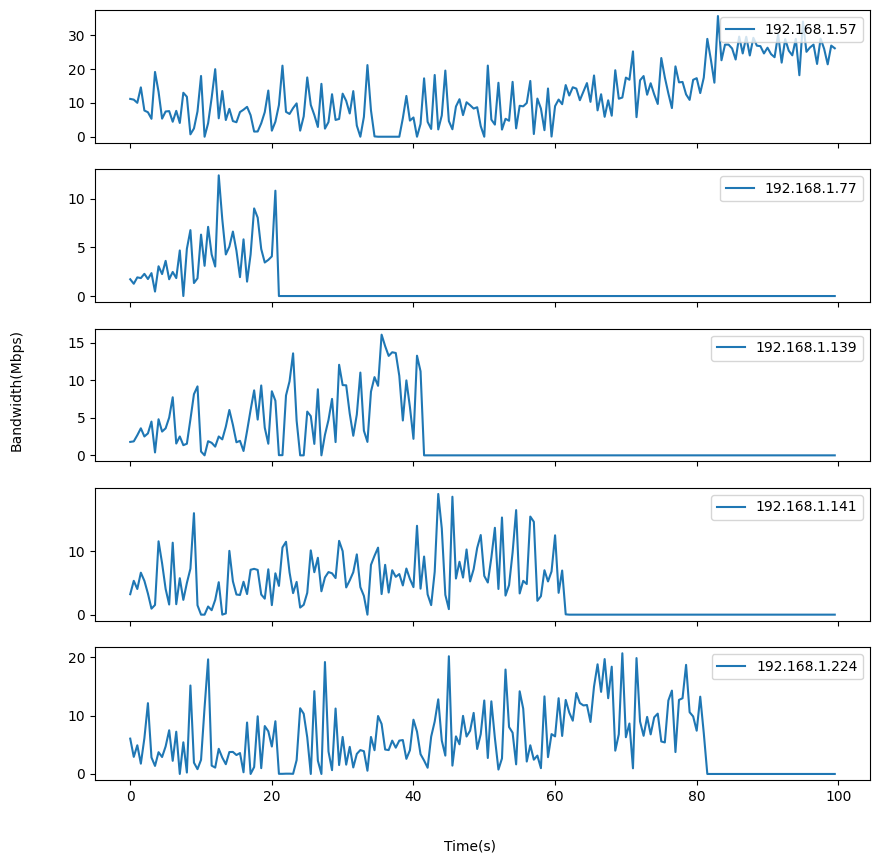

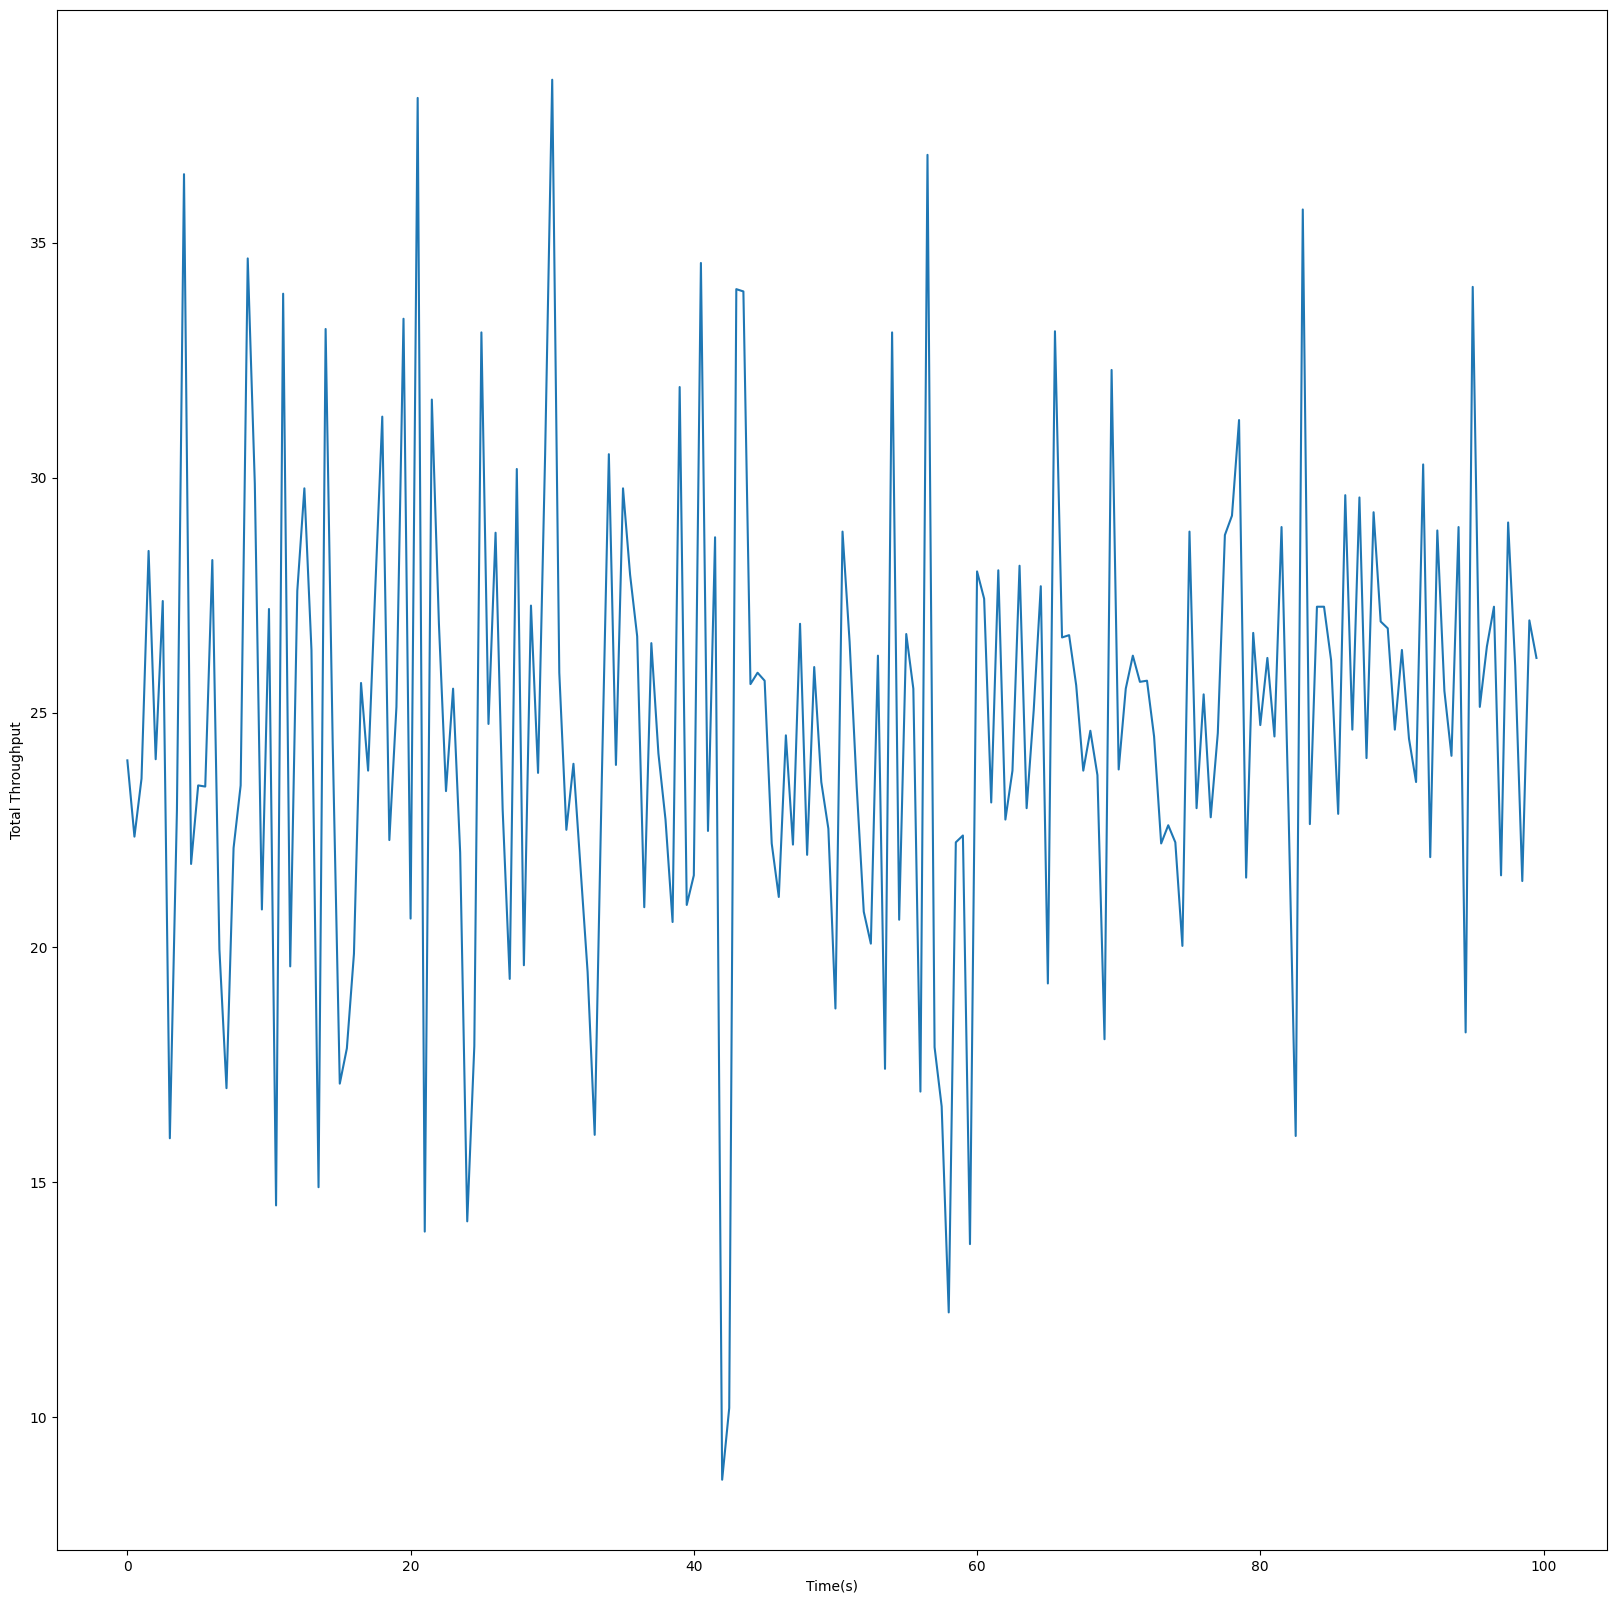

0-20 seconds:
Client 1:  0.3295298052331307
Client 2:  0.15741196144009417
Client 3:  0.14137812315561651
Client 4:  0.18291363368089703
Client 5:  0.1887664764902617
20-40 seconds:
Client 1:  0.2646872100405335
Client 2:  0.014992430531816172
Client 3:  0.28434340967915234
Client 4:  0.2461053865312299
Client 5:  0.189871563217268
40-60 seconds:
Client 1:  0.3343331072974807
Client 2:  0.0
Client 3:  0.028767409107506157
Client 4:  0.3430702623754629
Client 5:  0.29382922121955024
60-80 seconds:
Client 1:  0.5403604640015341
Client 2:  0.0
Client 3:  0.0
Client 4:  0.02269676924551811
Client 5:  0.4369427667529477
80-100 seconds:
Client 1:  0.9733090263170198
Client 2:  0.0
Client 3:  0.0
Client 4:  0.0
Client 5:  0.02669097368298034


In [6]:
Q1(500)